In [1]:
# import all the necessary libraries
import pandas as pd

In [2]:
# Import the data 
filepath = 'C:/Users/ernest/Documents/Helen_NAPTIN/'
filename = 'dataset_for_rice_and_maize.xlsx'
dataframe = pd.read_excel(filepath + filename)
dataframe.head(5)

,ItemLabels,Rice Price,Maize Price
0,2017-01-01,248.693333,137.84
1,2017-02-01,264.239667,156.06
2,2017-03-01,308.405172,158.83
3,2017-04-01,264.574810,173.32
4,2017-05-01,268.620690,160.82


In [3]:
# shape of the data
shape = dataframe.shape
print(shape)

(58, 3)


In [4]:
# check for missing values
dataframe.isna().sum()

ItemLabels     0
Rice Price     0
Maize Price    0
dtype: int64

In [5]:
# the datatype in the dataset
types = dataframe.dtypes
print(types)

ItemLabels     datetime64[ns]
Rice Price            float64
Maize Price           float64
dtype: object


In [6]:
#convert the date column to datetime
dataframe['ItemLabels'] =  pd.to_datetime(dataframe['ItemLabels'])
dataframe.head()

,ItemLabels,Rice Price,Maize Price
0,2017-01-01,248.693333,137.84
1,2017-02-01,264.239667,156.06
2,2017-03-01,308.405172,158.83
3,2017-04-01,264.574810,173.32
4,2017-05-01,268.620690,160.82


In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ItemLabels   58 non-null     datetime64[ns]
 1   Rice Price   58 non-null     float64       
 2   Maize Price  58 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.5 KB


In [8]:
#set the date column (ItemLabels) to index
dataframe.set_index('ItemLabels', inplace=True)
dataframe.head()

,Rice Price,Maize Price
ItemLabels,,
2017-01-01,248.693333,137.84
2017-02-01,264.239667,156.06
2017-03-01,308.405172,158.83
2017-04-01,264.574810,173.32
2017-05-01,268.620690,160.82


In [9]:
ts = dataframe

In [10]:
ts.describe().T

,count,mean,std,min,25%,50%,75%,max
Rice Price,58.0,259.112598,59.169198,6.890143,240.394089,254.453851,277.033417,375.615764
Maize Price,58.0,137.163993,42.209170,8.703130,112.222407,127.799824,156.090000,276.610644


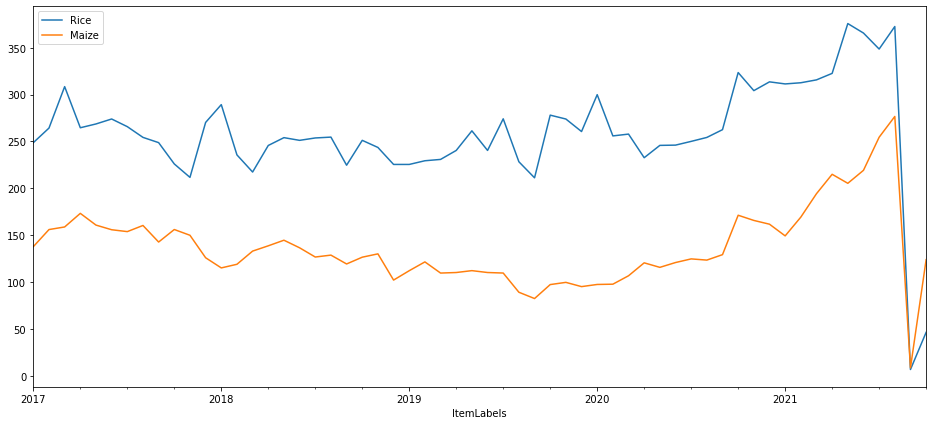

In [61]:
# Data exploration
import matplotlib.pyplot as plt

fig, ax=plt.subplots(figsize=(16, 7))
ts['Rice Price'].plot(ax=ax, label='Rice')
ts['Maize Price'].plot(ax=ax, label='Maize')
ax.legend();

In [12]:
ts_rice = ts['Rice Price']
ts_maize = ts['Maize Price']

In [13]:
ts_rice.head()

ItemLabels
2017-01-01    248.693333
2017-02-01    264.239667
2017-03-01    308.405172
2017-04-01    264.574810
2017-05-01    268.620690
Name: Rice Price, dtype: float64

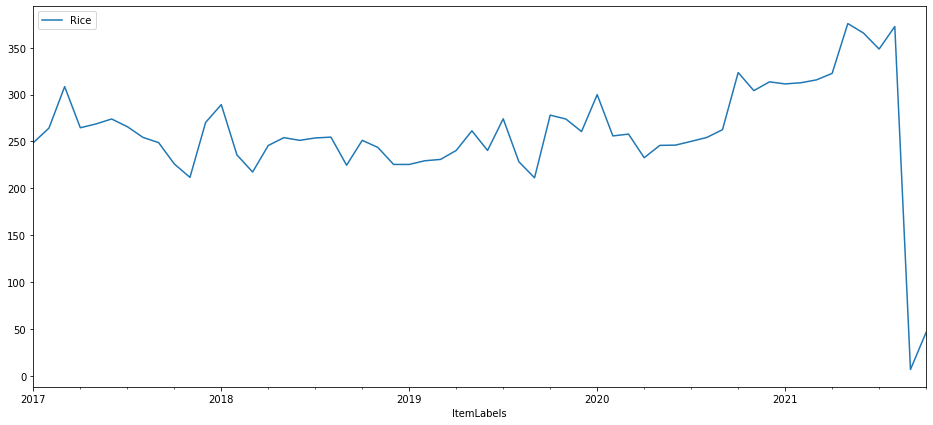

In [14]:
fig, ax=plt.subplots(figsize=(16, 7))
ts_rice.plot(ax=ax, label='Rice')
ax.legend();

In [15]:
ts_maize.head()

ItemLabels
2017-01-01    137.84
2017-02-01    156.06
2017-03-01    158.83
2017-04-01    173.32
2017-05-01    160.82
Name: Maize Price, dtype: float64

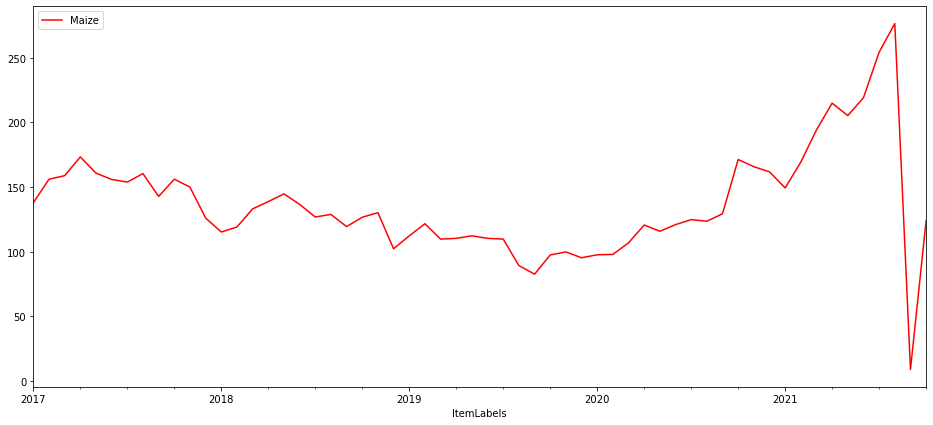

In [16]:
fig, ax=plt.subplots(figsize=(16, 7))
ts_maize.plot(ax=ax, label='Maize', color='red')
ax.legend();

In [17]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Rice Analysis

In [18]:
rice_result = adfuller(ts_rice, autolag='AIC')
print(f'ADF Statistic: {rice_result[0]}')
print(f'n_lags: {rice_result[1]}')
print(f'p-value: {rice_result[1]}')
for key, value in rice_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.1044147048989386
n_lags: 0.02622820092326481
p-value: 0.02622820092326481
Critial Values:
   1%, -3.5506699942762414
Critial Values:
   5%, -2.913766394626147
Critial Values:
   10%, -2.5946240473991997


In [19]:
# check for stationarity - rolling stat method
roll_mean_rice = ts_rice.rolling(12).mean()
roll_std_rice = ts_rice.rolling(12).std()

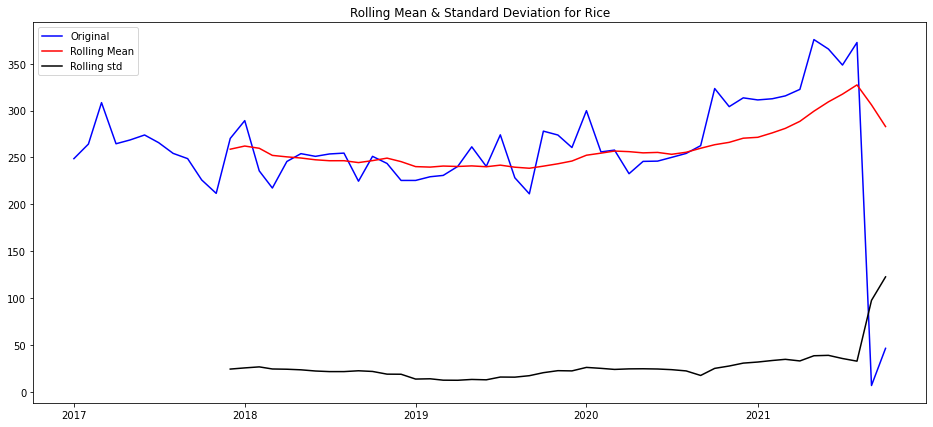

In [20]:
# plot 
plt.figure(figsize = (16,7))
fig = plt.figure(1)

# plot rolling stat
original = plt.plot(ts_rice, color='blue', label='Original')
mean = plt.plot(roll_mean_rice, color='red', label='Rolling Mean')
std = plt.plot(roll_std_rice, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Rice')
plt.show(block = False)

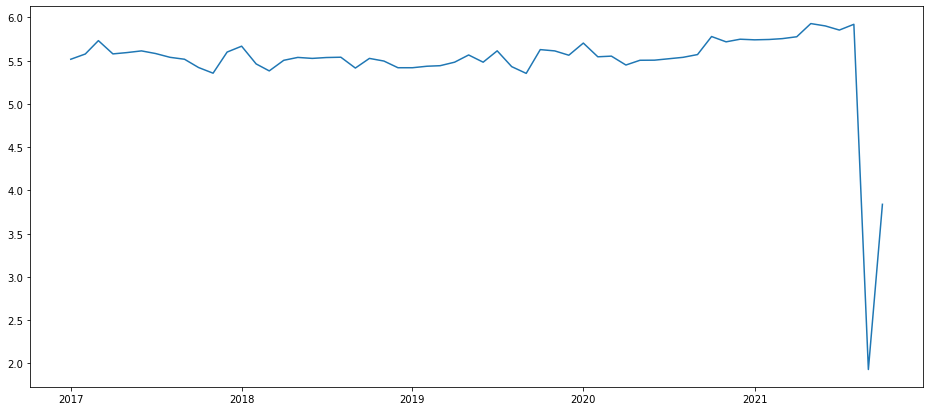

In [21]:
# making series stationary
# transformation

import numpy as np

plt.figure(figsize = (16,7))
fig = plt.figure(1)

ts_rice_log = np.log(ts_rice) #log transformation

plt.plot(ts_rice_log)

<ipython-input-22-a52b3ca7e520>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(ts_rice_log, freq=1, model = 'multiplicative')


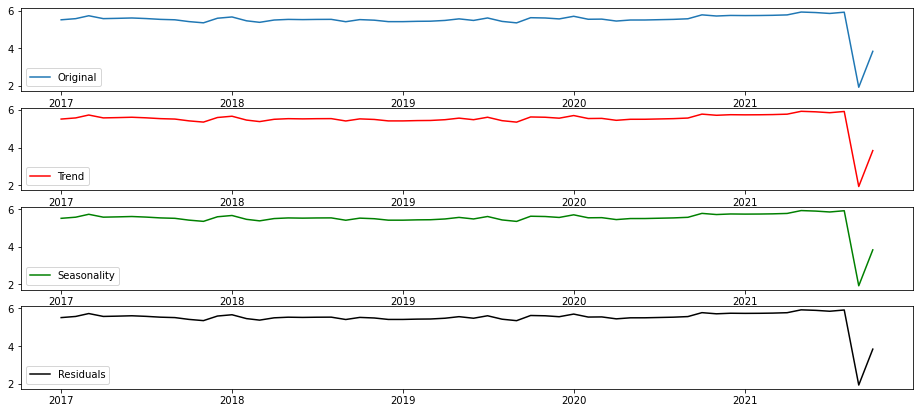

In [22]:
# Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_rice_log, freq=1, model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_rice_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(ts_rice_log, label='Trend', color='red')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(ts_rice_log, label='Seasonality', color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(ts_rice_log, label='Residuals', color='black')
plt.legend(loc='best')


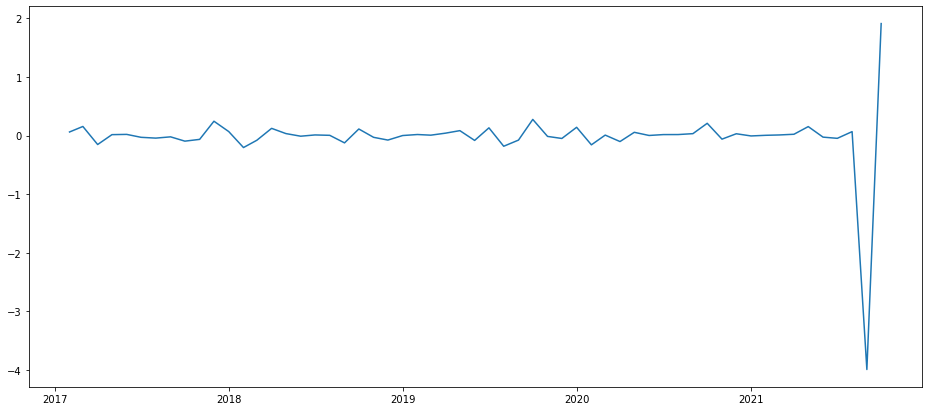

In [23]:
# differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_rice_log_diff = ts_rice_log - ts_rice_log.shift()
plt.plot(ts_rice_log_diff)

In [24]:
# check for stationarity - rolling stat method
roll_mean_rice_diff = ts_rice.rolling(12).mean()
roll_std_rice_diff = ts_rice.rolling(12).std()

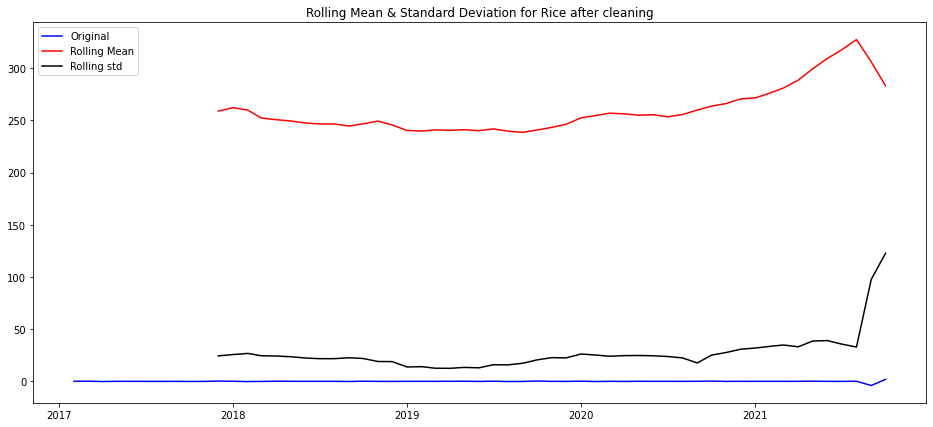

In [25]:
# plot 
plt.figure(figsize = (16,7))
fig = plt.figure(1)

# plot rolling stat
original = plt.plot(ts_rice_log_diff, color='blue', label='Original')
mean = plt.plot(roll_mean_rice_diff, color='red', label='Rolling Mean')
std = plt.plot(roll_std_rice_diff, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Rice after cleaning')
plt.show(block = False)

C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


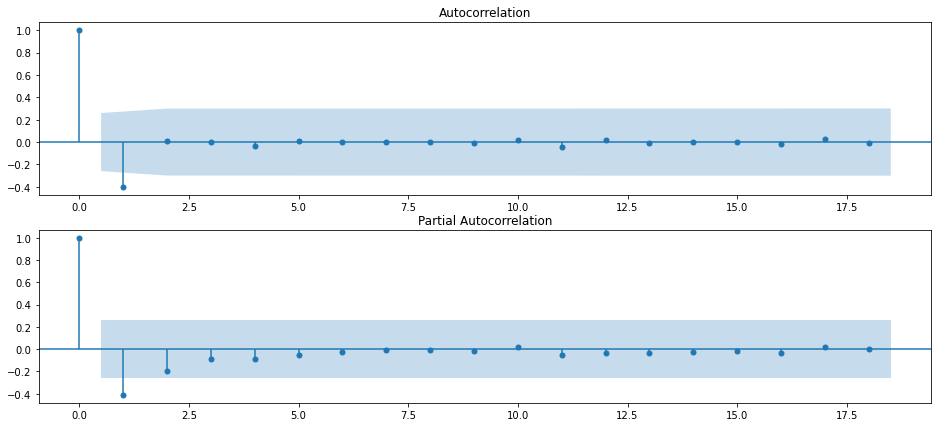

In [26]:
#cross validating 
import statsmodels.api as sim
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_rice_log_diff, nlags = 20)
lag_pacf = pacf(ts_rice_log_diff, nlags = 20)

fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(211)
fig = sim.graphics.tsa.plot_acf(ts_rice_log_diff.dropna(), ax = ax1)

ax2 = fig.add_subplot(212)
fig = sim.graphics.tsa.plot_pacf(ts_rice_log_diff.dropna(), ax = ax2)


C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


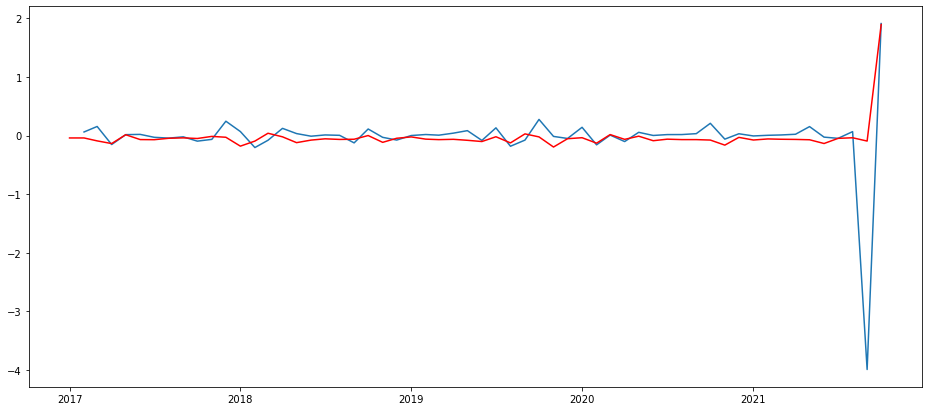

In [27]:
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(16,7))
model = ARIMA(ts_rice_log_diff, order = (1,0,0))
rice_results_ARIMA = model.fit()
plt.plot(ts_rice_log_diff)
plt.plot(rice_results_ARIMA.fittedvalues, color='red')

In [28]:
# taking results back to original scale
ARIMA_diff_pred = pd.Series(rice_results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_pred.head())

ItemLabels
2017-01-01   -0.041258
2017-02-01   -0.041258
2017-03-01   -0.091149
2017-04-01   -0.137135
2017-05-01    0.013595
dtype: float64


In [29]:
ARIMA_diff_pred_cumsum = ARIMA_diff_pred.cumsum()
print(ARIMA_diff_pred_cumsum.head())

ItemLabels
2017-01-01   -0.041258
2017-02-01   -0.082517
2017-03-01   -0.173666
2017-04-01   -0.310801
2017-05-01   -0.297206
dtype: float64


In [30]:
ARIMA_log_pred = pd.Series(ts_rice_log.iloc[0], index=ts_rice_log.index)
ARIMA_log_pred = ARIMA_log_pred.add(ARIMA_diff_pred_cumsum, fill_value=0)
ARIMA_log_pred.head()

ItemLabels
2017-01-01    5.474962
2017-02-01    5.433704
2017-03-01    5.342555
2017-04-01    5.205419
2017-05-01    5.219015
dtype: float64

Text(0.5, 1.0, 'Rice RMSE: 211.0027!')

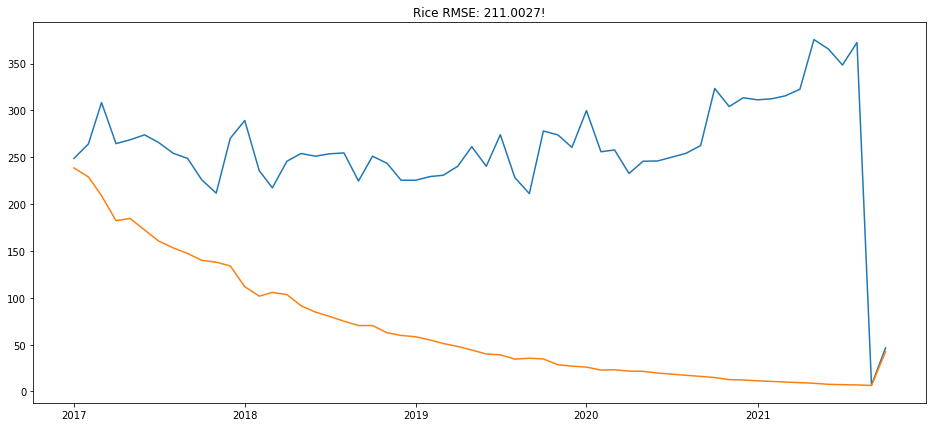

In [32]:
plt.figure(figsize=(16,7))
prediction_ARIMA = np.exp(ARIMA_log_pred)
plt.plot(ts_rice, label='Original Rice Price')
plt.plot(prediction_ARIMA, label='Predicted Rice Price')
prediction_ARIMA.plot(ax=ax, label='Predicted Rice Price')
plt.title('Rice RMSE: %.4f!'% np.sqrt(sum((prediction_ARIMA - ts_rice)**2/len(ts_rice))))

In [48]:
ARIMA_future_results = rice_results_ARIMA.predict('2017-01-01','2024-01-01')

In [50]:
ARIMA_future_pred = pd.Series(ARIMA_future_results, copy=True)
print(ARIMA_future_pred.tail())

2023-09-01   -0.041259
2023-10-01   -0.041258
2023-11-01   -0.041258
2023-12-01   -0.041258
2024-01-01   -0.041258
Freq: MS, Name: predicted_mean, dtype: float64


In [51]:
ARIMA_future_pred_cumsum = ARIMA_future_pred.cumsum()
print(ARIMA_future_pred_cumsum.tail())

2023-09-01   -3.358477
2023-10-01   -3.399735
2023-11-01   -3.440994
2023-12-01   -3.482252
2024-01-01   -3.523511
Freq: MS, Name: predicted_mean, dtype: float64


In [52]:
ARIMA_futlog_pred = pd.Series(ts_rice_log.iloc[0], index=ts_rice_log.index)
ARIMA_futlog_pred = ARIMA_futlog_pred.add(ARIMA_future_pred_cumsum, fill_value=0)
ARIMA_futlog_pred.tail()

2023-09-01   -3.358477
2023-10-01   -3.399735
2023-11-01   -3.440994
2023-12-01   -3.482252
2024-01-01   -3.523511
dtype: float64

Text(0.5, 1.0, 'Rice Prediction for the next 27 Months')

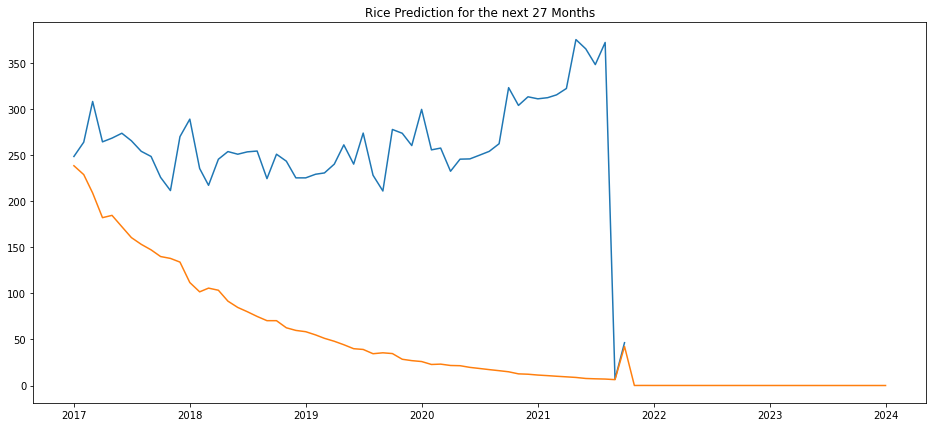

In [54]:
plt.figure(figsize=(16,7))
future_prediction_ARIMA = np.exp(ARIMA_futlog_pred)
plt.plot(ts_rice, label='Original Rice Price')
plt.plot(future_prediction_ARIMA, label='Predicted Rice Price')
future_prediction_ARIMA.plot(ax=ax, label='Predicted Rice Price')
plt.title('Rice Prediction for the next 27 Months')
# plt.title('Rice RMSE: %.4f!'% np.sqrt(sum((future_prediction_ARIMA - ts_rice)**2/len(ts_rice))))

In [ ]:
ARIMA_future_results = rice_results_ARIMA.predict('2017-01-01','2024-01-01')

C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


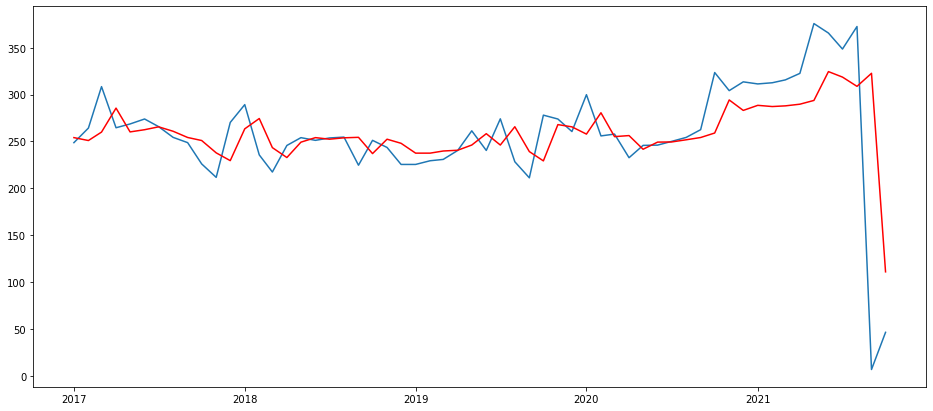

In [55]:
plt.figure(figsize=(16,7))
model = ARIMA(ts_rice, order = (1,0,0))
rice_original_ARIMA = model.fit()
plt.plot(ts_rice)
plt.plot(rice_original_ARIMA.fittedvalues, color='red')

In [57]:
ARIMA_ori_fut_results = rice_original_ARIMA.predict('2017-01-01','2024-01-01')
print(ARIMA_ori_fut_results.tail())

2023-09-01    254.058877
2023-10-01    254.059179
2023-11-01    254.059354
2023-12-01    254.059455
2024-01-01    254.059514
Freq: MS, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Rice original Prediction for the next 27 Months')

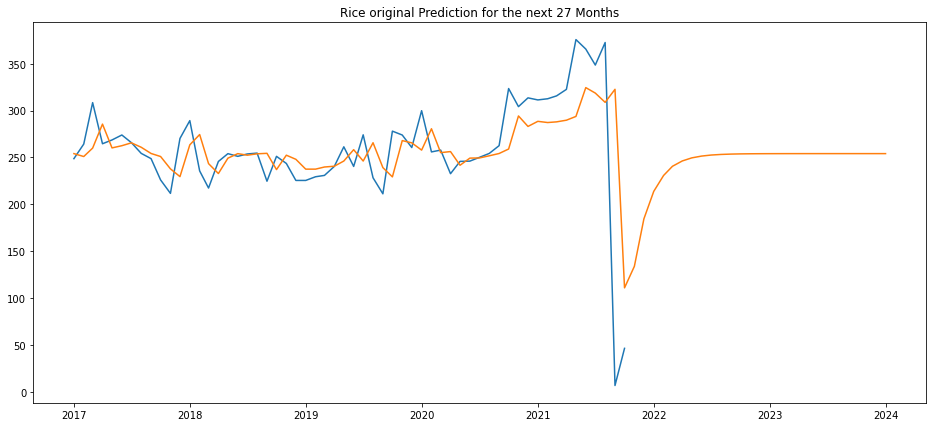

In [58]:
plt.figure(figsize=(16,7))
#future_prediction_ARIMA = np.exp(ARIMA_futlog_pred)
plt.plot(ts_rice, label='Original Rice Price')
plt.plot(ARIMA_ori_fut_results, label='Predicted Rice Price')
ARIMA_ori_fut_results.plot(ax=ax, label='Predicted Rice Price')
plt.title('Rice original Prediction for the next 27 Months')
# plt.title('Rice RMSE: %.4f!'% np.sqrt(sum((future_prediction_ARIMA - ts_rice)**2/len(ts_rice))))

Text(0.5, 1.0, 'Comparsion of predictions')

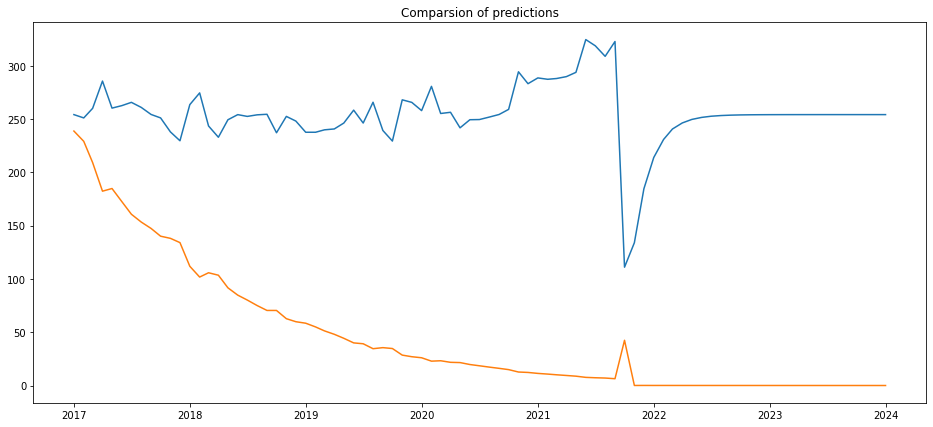

In [59]:
plt.figure(figsize=(16,7))
#future_prediction_ARIMA = np.exp(ARIMA_futlog_pred)
#plt.plot(ts_rice, label='Original Rice Price')
plt.plot(ARIMA_ori_fut_results, label='Predicted Rice Price')
plt.plot(future_prediction_ARIMA, label='Predicted Rice Price')
plt.title('Comparsion of predictions')
# plt.title('Rice RMSE: %.4f!'% np.sqrt(sum((future_prediction_ARIMA - ts_rice)**2/len(ts_rice))))

# Maize Analysis

In [62]:
maize_result = adfuller(ts_maize, autolag='AIC')
print(f'ADF Statistic: {maize_result[0]}')
print(f'n_lags: {maize_result[1]}')
print(f'p-value: {maize_result[1]}')
for key, value in maize_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.4798870207388488
n_lags: 0.5434364462161764
p-value: 0.5434364462161764
Critial Values:
   1%, -3.5812576580093696
Critial Values:
   5%, -2.9267849124681518
Critial Values:
   10%, -2.6015409829867675


In [63]:
# check for stationarity - rolling stat method
roll_mean_maize = ts_maize.rolling(12).mean()
roll_std_maize = ts_maize.rolling(12).std()

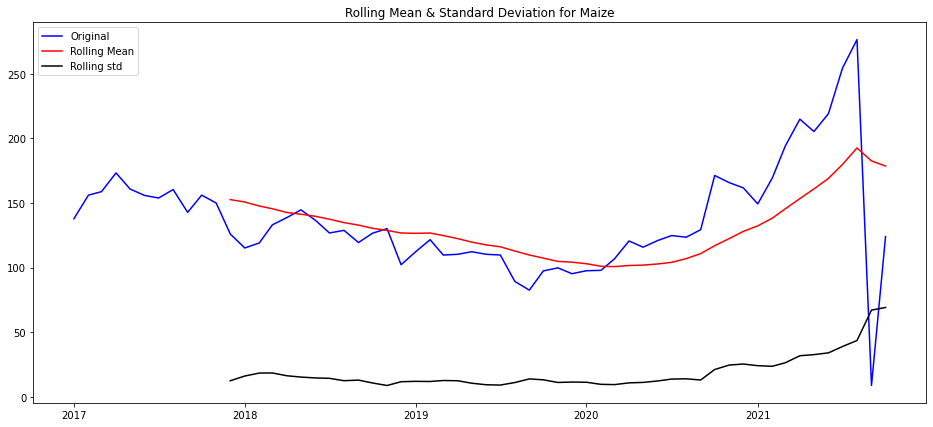

In [64]:
# plot 
plt.figure(figsize = (16,7))
fig = plt.figure(1)

# plot rolling stat
original = plt.plot(ts_maize, color='blue', label='Original')
mean = plt.plot(roll_mean_maize, color='red', label='Rolling Mean')
std = plt.plot(roll_std_maize, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Maize')
plt.show(block = False)

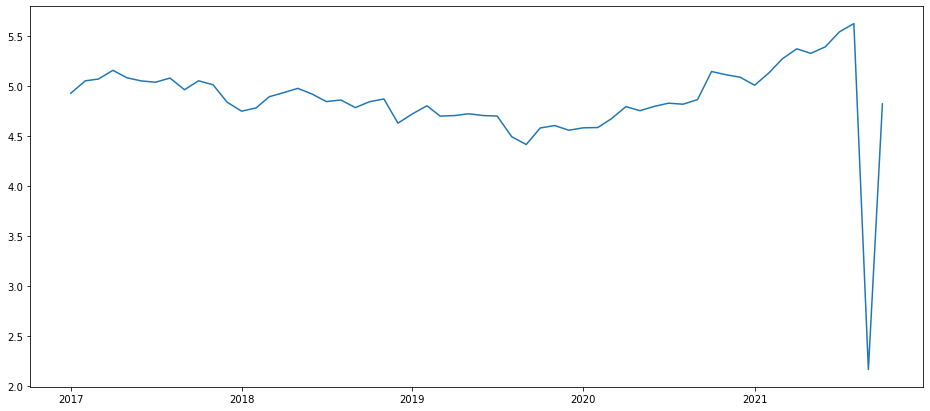

In [65]:
# making series stationary
# transformation

#import numpy as np

plt.figure(figsize = (16,7))
fig = plt.figure(1)

ts_maize_log = np.log(ts_maize) #log transformation

plt.plot(ts_maize_log)

<ipython-input-68-bc08afe3b93d>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(ts_rice_log, freq=1, model = 'multiplicative')


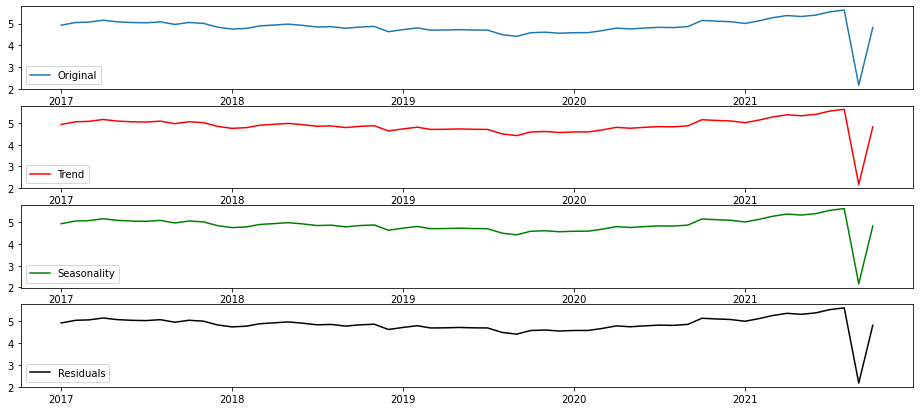

In [68]:
# Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_rice_log, freq=1, model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_maize_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(ts_maize_log, label='Trend', color='red')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(ts_maize_log, label='Seasonality', color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(ts_maize_log, label='Residuals', color='black')
plt.legend(loc='best')


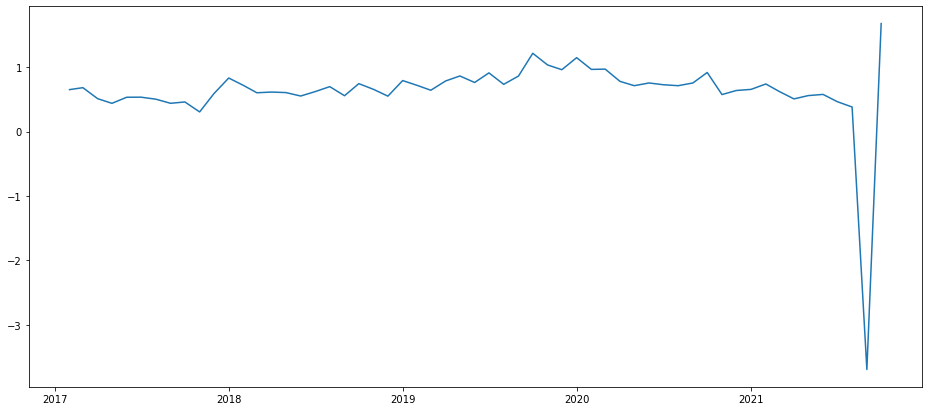

In [69]:
# differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_maize_log_diff = ts_rice_log - ts_maize_log.shift()
plt.plot(ts_maize_log_diff)

In [70]:
# check for stationarity - rolling stat method
roll_mean_maize_diff = ts_maize.rolling(12).mean()
roll_std_maize_diff = ts_maize.rolling(12).std()

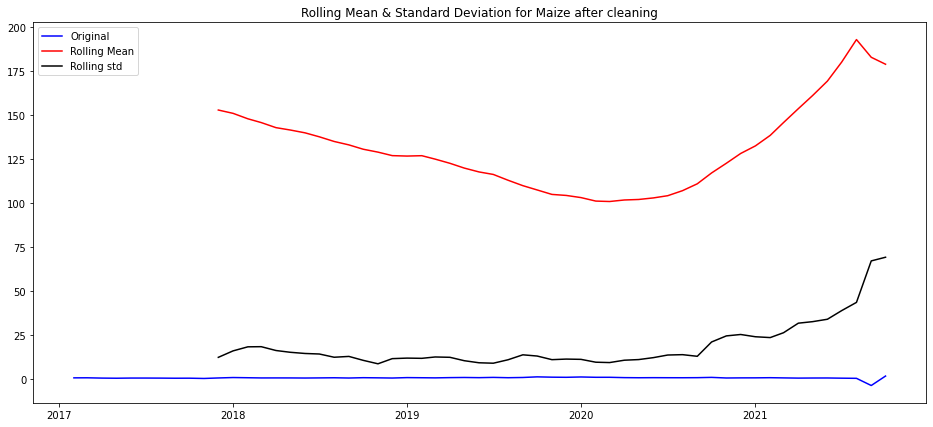

In [71]:
# plot 
plt.figure(figsize = (16,7))
fig = plt.figure(1)

# plot rolling stat
original = plt.plot(ts_maize_log_diff, color='blue', label='Original')
mean = plt.plot(roll_mean_maize_diff, color='red', label='Rolling Mean')
std = plt.plot(roll_std_maize_diff, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Maize after cleaning')
plt.show(block = False)

C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


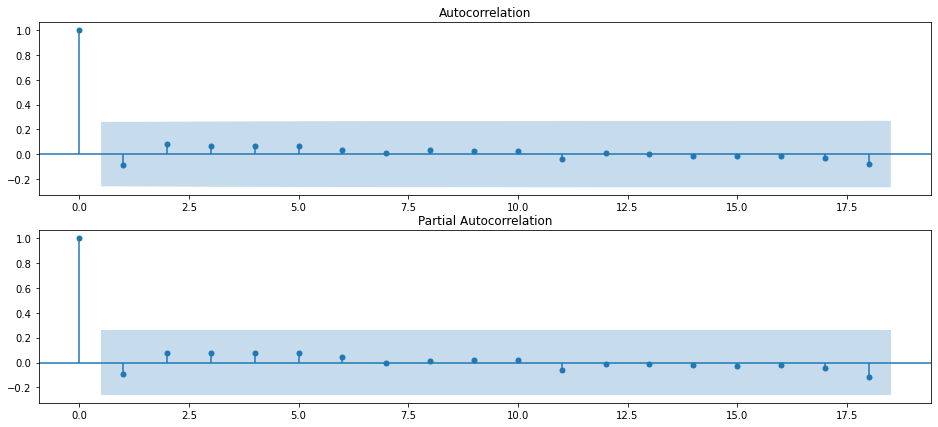

In [72]:
#cross validating 
import statsmodels.api as sim
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_maize_log_diff, nlags = 20)
lag_pacf = pacf(ts_maize_log_diff, nlags = 20)

fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(211)
fig = sim.graphics.tsa.plot_acf(ts_maize_log_diff.dropna(), ax = ax1)

ax2 = fig.add_subplot(212)
fig = sim.graphics.tsa.plot_pacf(ts_maize_log_diff.dropna(), ax = ax2)

C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


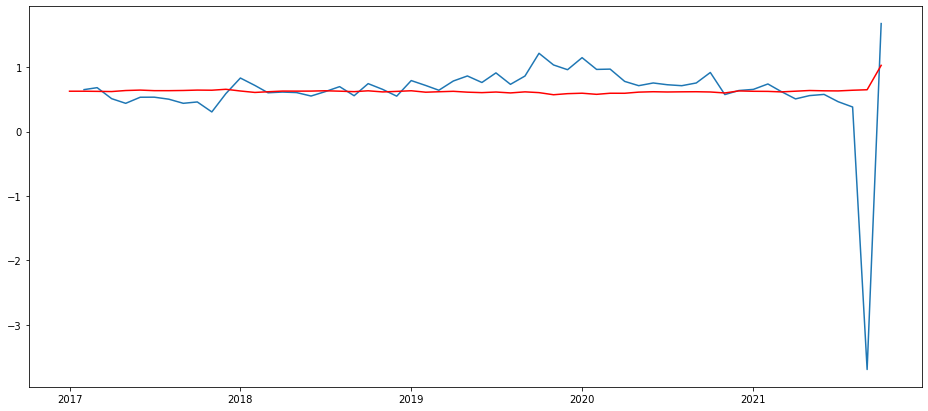

In [73]:
# from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(16,7))
model = ARIMA(ts_maize_log_diff, order = (1,0,0))
maize_results_ARIMA = model.fit()
plt.plot(ts_maize_log_diff)
plt.plot(maize_results_ARIMA.fittedvalues, color='red')

In [74]:
# taking results back to original scale
ARIMA_diff_pred = pd.Series(maize_results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_pred.head())

ItemLabels
2017-01-01    0.626062
2017-02-01    0.626062
2017-03-01    0.623766
2017-04-01    0.620940
2017-05-01    0.636821
dtype: float64


In [75]:
ARIMA_diff_pred_cumsum = ARIMA_diff_pred.cumsum()
print(ARIMA_diff_pred_cumsum.head())

ItemLabels
2017-01-01    0.626062
2017-02-01    1.252123
2017-03-01    1.875889
2017-04-01    2.496829
2017-05-01    3.133650
dtype: float64


In [76]:
ARIMA_log_pred = pd.Series(ts_maize_log.iloc[0], index=ts_maize_log.index)
ARIMA_log_pred = ARIMA_log_pred.add(ARIMA_diff_pred_cumsum, fill_value=0)
ARIMA_log_pred.head()

ItemLabels
2017-01-01    5.552155
2017-02-01    6.178217
2017-03-01    6.801983
2017-04-01    7.422923
2017-05-01    8.059744
dtype: float64

Text(0.5, 1.0, 'Maize RMSE: 126346452767498832.0000!')

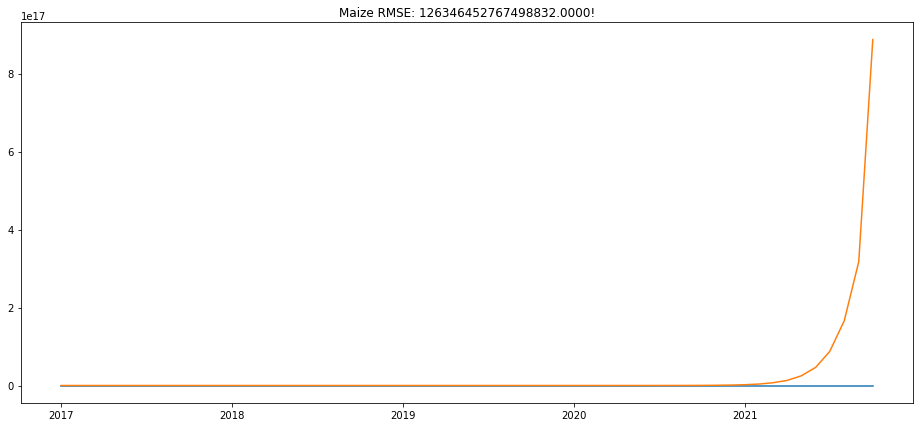

In [77]:
plt.figure(figsize=(16,7))
prediction_ARIMA = np.exp(ARIMA_log_pred)
plt.plot(ts_maize, label='Original Maize Price')
plt.plot(prediction_ARIMA, label='Predicted Maize Price')
prediction_ARIMA.plot(ax=ax, label='Predicted Maize Price')
plt.title('Maize RMSE: %.4f!'% np.sqrt(sum((prediction_ARIMA - ts_maize)**2/len(ts_maize))))

In [89]:
ARIMA_future_results = maize_results_ARIMA.predict('2017-01-01','2024-01-01')

In [85]:
ARIMA_future_pred = pd.Series(ARIMA_future_results, copy=True)
print(ARIMA_future_pred.tail())

2023-09-01    0.626062
2023-10-01    0.626062
2023-11-01    0.626062
2023-12-01    0.626062
2024-01-01    0.626062
Freq: MS, Name: predicted_mean, dtype: float64


In [86]:
ARIMA_future_pred_cumsum = ARIMA_future_pred.cumsum()
print(ARIMA_future_pred_cumsum.tail())

2023-09-01    50.710759
2023-10-01    51.336820
2023-11-01    51.962882
2023-12-01    52.588944
2024-01-01    53.215006
Freq: MS, Name: predicted_mean, dtype: float64


In [87]:
ARIMA_futlog_pred = pd.Series(ts_maize_log.iloc[0], index=ts_maize_log.index)
ARIMA_futlog_pred = ARIMA_futlog_pred.add(ARIMA_future_pred_cumsum, fill_value=0)
ARIMA_futlog_pred.tail()

2023-09-01    50.710759
2023-10-01    51.336820
2023-11-01    51.962882
2023-12-01    52.588944
2024-01-01    53.215006
dtype: float64

Text(0.5, 1.0, 'Maize Prediction for the next 27 Months')

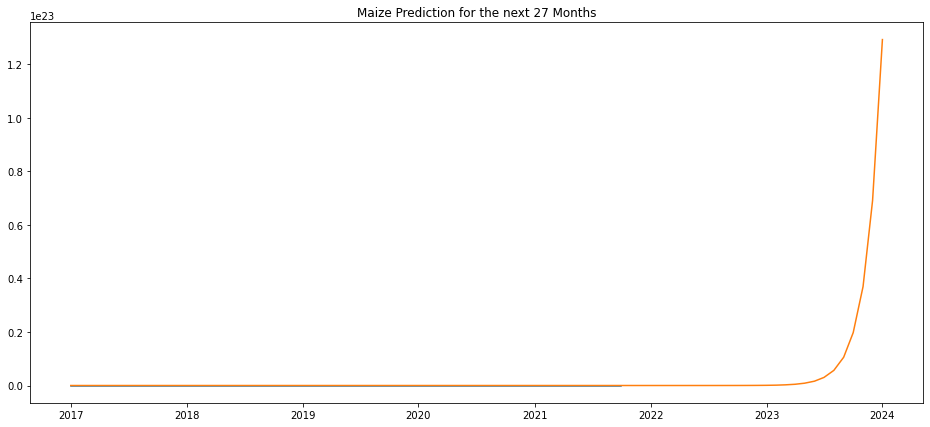

In [88]:
plt.figure(figsize=(16,7))
future_prediction_ARIMA = np.exp(ARIMA_futlog_pred)
plt.plot(ts_maize, label='Original Rice Price')
plt.plot(future_prediction_ARIMA, label='Predicted Rice Price')
future_prediction_ARIMA.plot(ax=ax, label='Predicted Rice Price')
plt.title('Maize Prediction for the next 27 Months')
# plt.title('Rice RMSE: %.4f!'% np.sqrt(sum((future_prediction_ARIMA - ts_rice)**2/len(ts_rice))))

In [78]:
ARIMA_future_results = maize_results_ARIMA.predict('2017-01-01','2024-01-01')

C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ernest\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


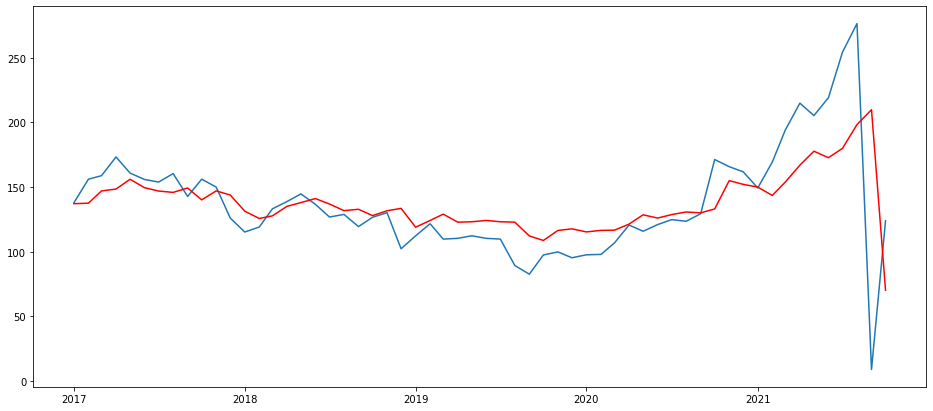

In [90]:
plt.figure(figsize=(16,7))
model = ARIMA(ts_maize, order = (1,0,0))
maize_original_ARIMA = model.fit()
plt.plot(ts_maize)
plt.plot(maize_original_ARIMA.fittedvalues, color='red')

In [91]:
ARIMA_ori_fut_results = maize_original_ARIMA.predict('2017-01-01','2024-01-01')
print(ARIMA_ori_fut_results.tail())

2023-09-01    137.132536
2023-10-01    137.132538
2023-11-01    137.132539
2023-12-01    137.132540
2024-01-01    137.132540
Freq: MS, Name: predicted_mean, dtype: float64


Text(0.5, 1.0, 'Maize original Prediction for the next 27 Months')

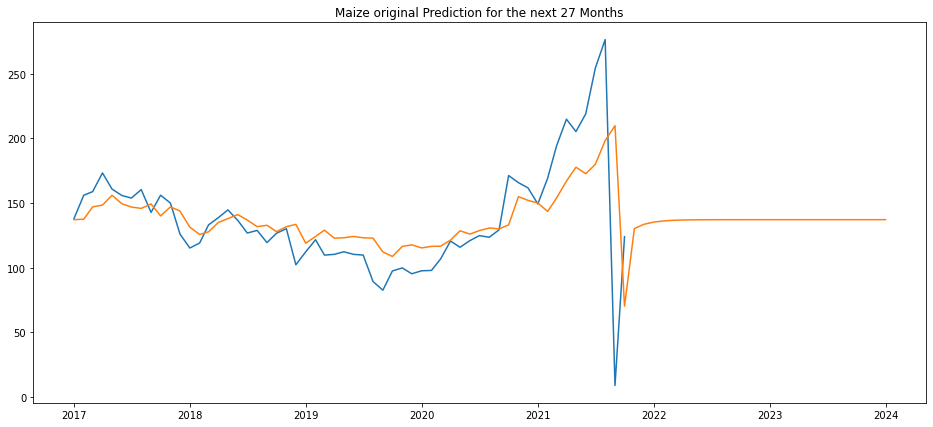

In [92]:
plt.figure(figsize=(16,7))
#future_prediction_ARIMA = np.exp(ARIMA_futlog_pred)
plt.plot(ts_maize, label='Original Maize Price')
plt.plot(ARIMA_ori_fut_results, label='Predicted Maize Price')
ARIMA_ori_fut_results.plot(ax=ax, label='Predicted Maize Price')
plt.title('Maize original Prediction for the next 27 Months')
# plt.title('Rice RMSE: %.4f!'% np.sqrt(sum((future_prediction_ARIMA - ts_rice)**2/len(ts_rice))))

Text(0.5, 1.0, 'Comparsion of predictions')

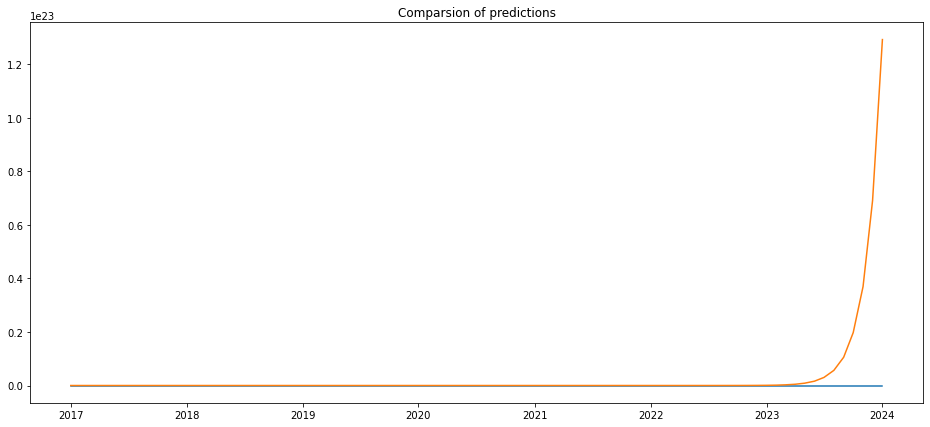

In [93]:
plt.figure(figsize=(16,7))
#future_prediction_ARIMA = np.exp(ARIMA_futlog_pred)
#plt.plot(ts_rice, label='Original Rice Price')
plt.plot(ARIMA_ori_fut_results, label='Predicted Maize Price')
plt.plot(future_prediction_ARIMA, label='Predicted Maize Price')
plt.title('Comparsion of predictions')
# plt.title('Rice RMSE: %.4f!'% np.sqrt(sum((future_prediction_ARIMA - ts_rice)**2/len(ts_rice))))